In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

**Load the dataset into the tool.**

In [4]:
data=pd.read_csv('/content/drive/MyDrive/IBM/Mall_Customers.csv')

**Perform Below Visualizations.**

**Univariate Analysis**

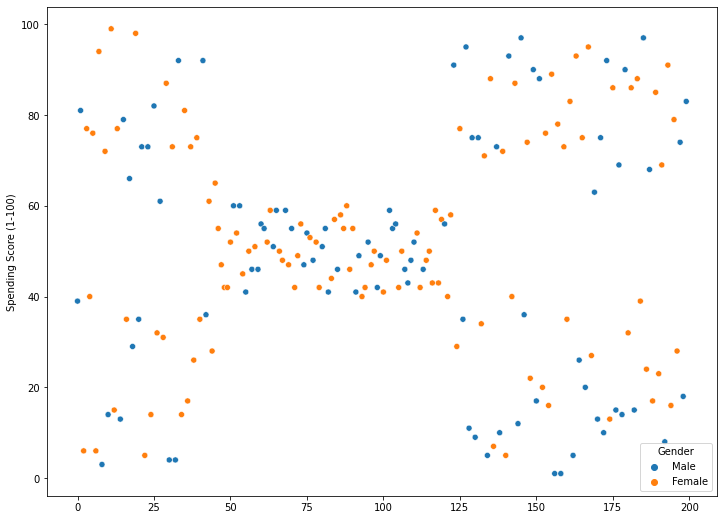

In [5]:
plt.figure(figsize=(12,9))
sns.scatterplot (x=data.index, y=data['Spending Score (1-100)'], hue=data['Gender'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


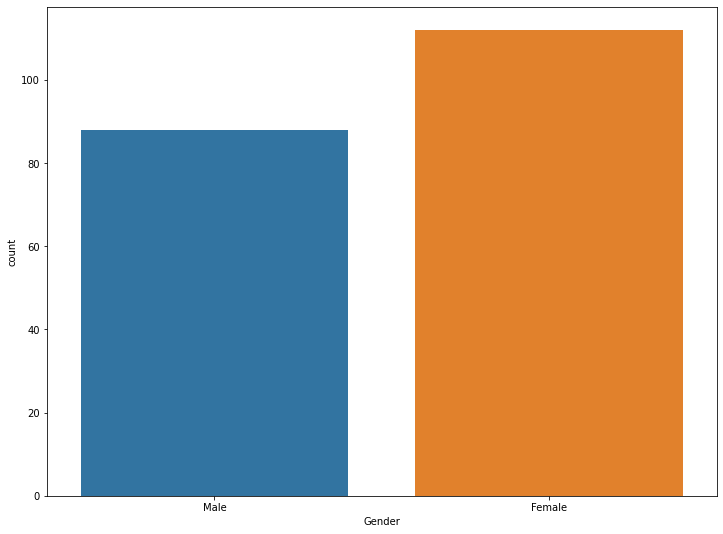

In [6]:
plt.figure(figsize=(12,9))
sns.countplot(data['Gender'])
plt.show()

**Bi-Variate Analysis**

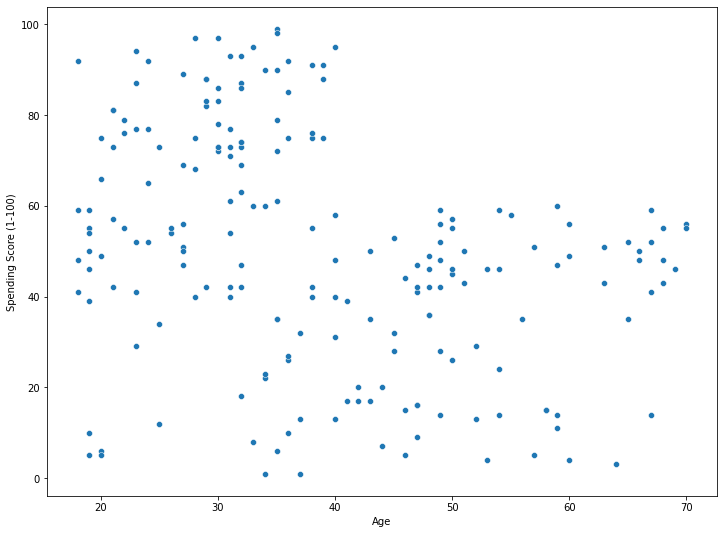

In [7]:
plt.figure(figsize=(12,9))
sns.scatterplot (x=data.Age, y=data['Spending Score (1-100)'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


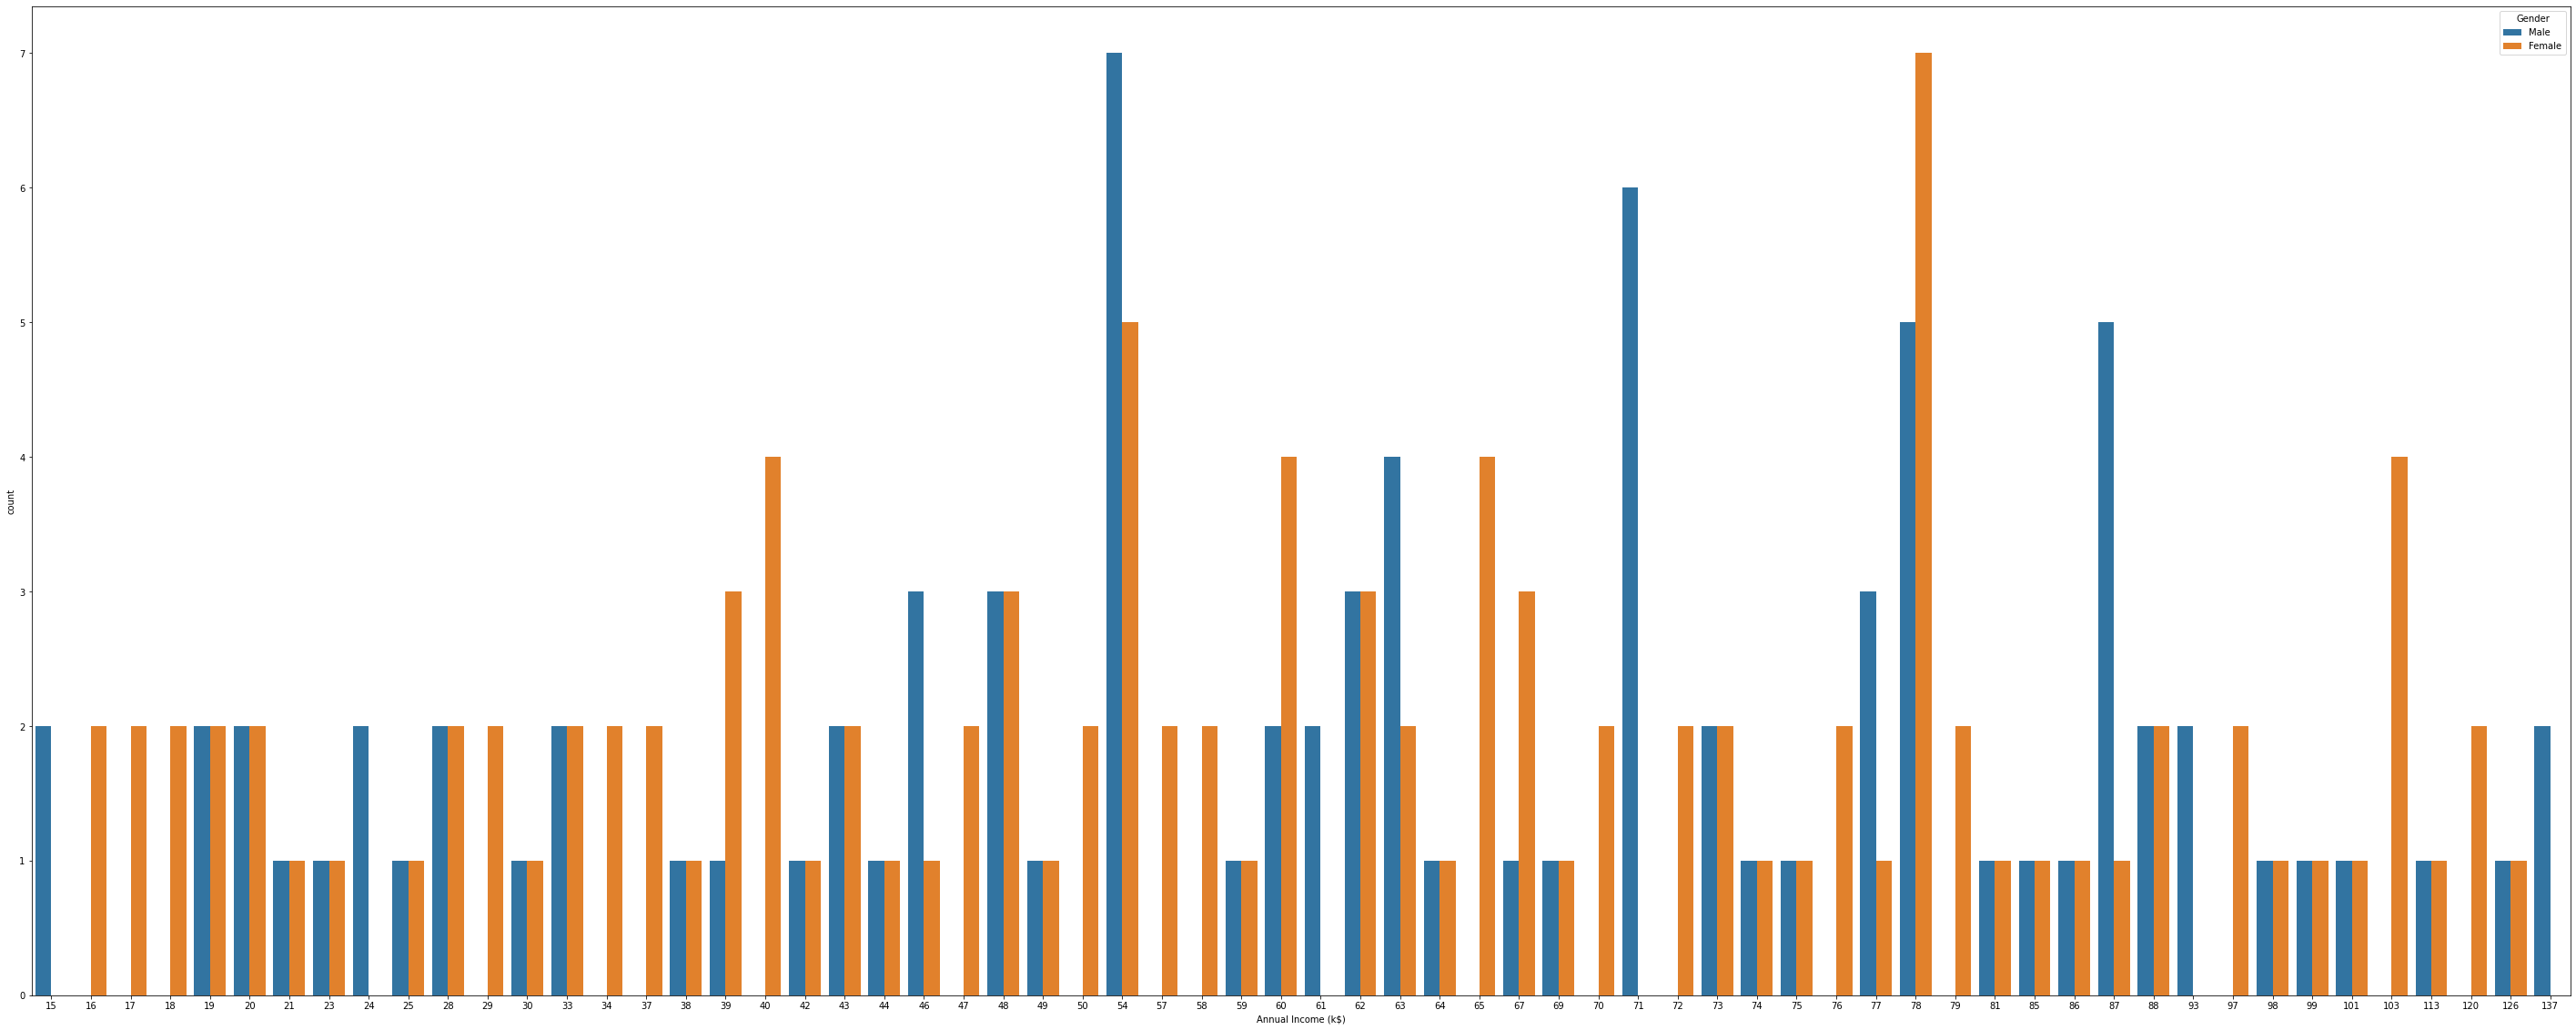

In [8]:
plt.figure(figsize=(50,20))
sns.countplot(data['Annual Income (k$)'], hue=data['Gender'])
plt.show()

**Multi-Variate Analysis**

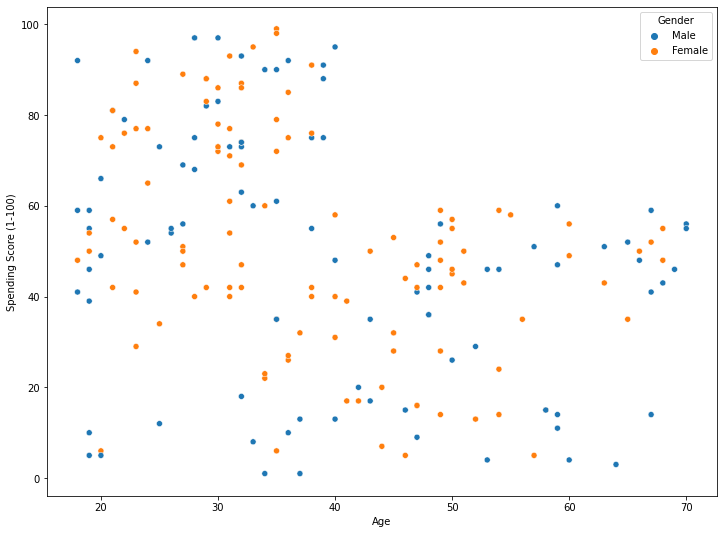

In [9]:
plt.figure(figsize=(12,9))
sns.scatterplot (x=data.Age, y=data['Spending Score (1-100)'], hue=data['Gender'])
plt.show()

**Perform descriptive statistics on the dataset.**

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Check for Missing values and deal with them.**

In [11]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Find the outliers and replace them outliers**

we don't need to change or replace the outlier because there is no missing values

In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
plt.figure(figsize=(12,5))
fig = px.box(data, y='Annual Income (k$)')
fig.show()

<Figure size 864x360 with 0 Axes>

In [14]:
plt.figure(figsize=(12,5))
fig = px.box(data, y='Annual Income (k$)')
fig.show()

<Figure size 864x360 with 0 Axes>

In [15]:
plt.figure(figsize=(12,5))
fig = px.box(data, y='Age')
fig.show()

<Figure size 864x360 with 0 Axes>

**Check for Categorical columns and perform encoding.**

In [16]:
for i in [data]:
  i["Gender"] = i["Gender"].map({"Male": 0, "Female":1}).astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


**Split the data into dependent and independent variables.**

In [18]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

**Scaling the data**

In [19]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
x = trans.fit_transform(x)
x = pd.DataFrame(x)

In [20]:
x.head()

,0,1,2,3
0,-1.723412,-1.128152,-1.424569,-1.738999
1,-1.706091,-1.128152,-1.281035,-1.738999
2,-1.688771,0.886405,-1.352802,-1.700830
3,-1.671450,0.886405,-1.137502,-1.700830
4,-1.654129,0.886405,-0.563369,-1.662660


In [21]:
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

**Perform any of the clustering algorithms**

In [23]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(data)
# assign a cluster to each example
yhat = model.predict(data)
# retrieve unique clusters
data['cluster']= yhat
# create scatter plot for samples from each cluster

**Split the data into training and testing**

In [24]:
from sklearn import model_selection 
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y, test_size=0.20)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 4)
(160,)
(40, 4)
(40,)


**Build the Model**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
log_reg=LogisticRegression()


**Train the Model**

In [27]:
log_reg.fit(x_train,y_train)

LogisticRegression()

**Test the Model**

In [28]:
pred=log_reg.predict(x_test)

**Measure the performance using Evaluation Metrics.**

In [29]:
from sklearn import metrics
print('Classification report')
print(metrics.classification_report(y_test,pred))

Classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.14      0.33      0.20         3
          43       0.00      0.00      0.00         0
          46       0.17      1.00      0.29         1
          48       0.00      0.00      0.00         3
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [30]:
from sklearn.metrics import *
print('Confusion matrix') 
print(metrics.confusion_matrix(y_test,pred))

Confusion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
